In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# initial gaussian beam
def gausian_beam(x,y,w0,n=1):
  return np.exp(-((x**2 + y**2)/(w0**2))**n)

# TL
def TL(x,y,k0,f):
  return np.exp(-1j*k0*(x**2 + y**2)/(2*f))

# TF
def TF(kx,ky,k0,z):
  return np.exp((1j*(kx**2 + ky**2)*z)/(2*k0))

# get k0 = 2*pi/lambda
def get_k(lam):
  return 2*np.pi/lam

In [4]:
# xy cordinat emesh
length = np.linspace(-0.5,0.5,100)
xv,yv = np.meshgrid(length,length)


In [5]:
# define the constants
w0 = 0.10         # width of the gaussian
lam = 1550e-9     # wavelength
f = 0.5           # focal length

k0 = get_k(lam)   # k0 value


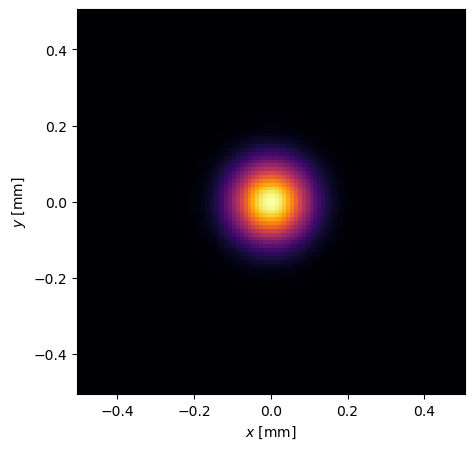

In [6]:
# plot the inital gausian beam
gausian_v = gausian_beam(xv,yv,w0)
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,gausian_v, cmap='inferno')
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.show()

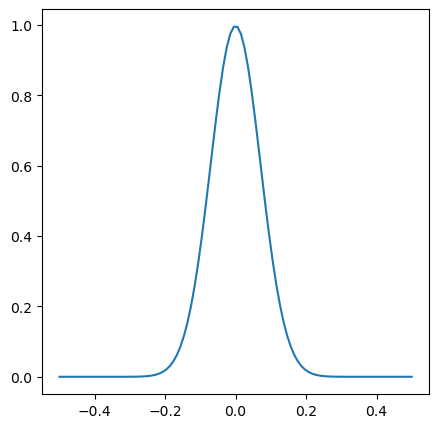

In [7]:
# cross section of inital gaussian
plt.figure(figsize=(5,5))
plt.plot(length,gausian_v[50])

In [9]:
# get fourior freq. (k values)
k = np.fft.fftfreq(len(length),np.diff(length)[0])*2*np.pi

# define mesh of kx,ky
kxv,kyv = np.meshgrid(k,k)

In [10]:
# TL values on (x,y) grid
TL_v = TL(xv,yv,k0,f)

# get FFT of gausian and TL

gausian_fft = np.fft.fft2(gausian_v)    # FFT of gausian
TL_fft = np.fft.fft2(TL_v)              # FFT of TL

after_lens_fft = gausian_fft * TL_fft   # take to product in FFT space (this is equal to convolution in real space)
after_lens     = np.fft.ifft2(after_lens_fft)  # take the inverse FFT (to get back into coordiante space == The convolustion in real space)

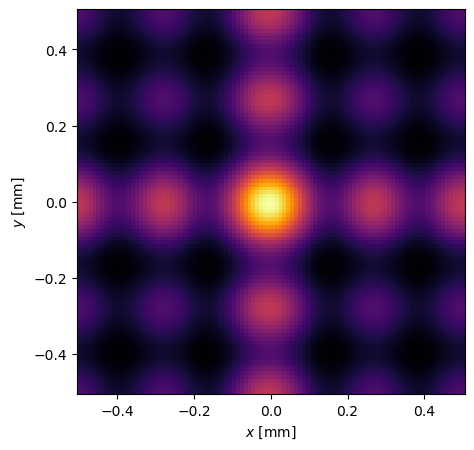

In [11]:
# plot the beam right after passing throgh the lense
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(after_lens), cmap='inferno')
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.show()

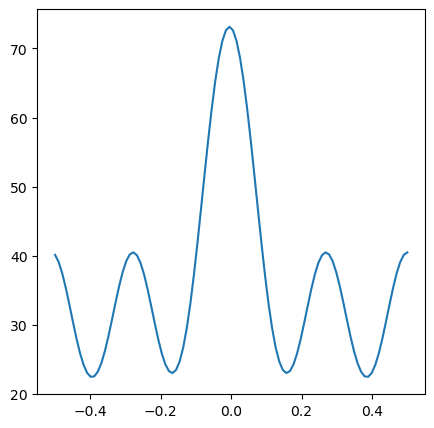

In [12]:
# corss section of the above figure (along x axis)
plt.figure(figsize=(5,5))
plt.plot(length,np.abs(after_lens)[50])